## Importing Libraries

In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

results = {}

In [69]:
df = pd.read_csv('../data/processed_data/student-mat.csv')
y = df['GPA']
x = df.drop(['GPA'], axis = 1)

In [70]:
x = x.iloc[:, 1:]

In [71]:
print(f"The shape of the input features is: {x.shape}\nThe shape of target parameters is: {y.shape}")

The shape of the input features is: (395, 42)
The shape of target parameters is: (395,)


In [72]:
x.head()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,guardian_mother,guardian_other,schoolsup_yes,famsup_yes,paid_yes,activities_yes,nursery_yes,higher_yes,internet_yes,romantic_yes
0,18,4,4,2,2,0,4,3,4,1,...,1,0,1,0,0,0,1,1,0,0
1,17,1,1,1,2,0,5,3,3,1,...,0,0,0,1,0,0,0,1,1,0
2,15,1,1,1,2,3,4,3,2,2,...,1,0,1,0,1,0,1,1,1,0
3,15,4,2,1,3,0,3,2,2,1,...,1,0,0,1,1,1,1,1,1,1
4,16,3,3,1,2,0,4,3,2,1,...,0,0,0,1,1,0,1,1,0,0


In [73]:
y.head()

0     5.666667
1     5.333333
2     8.333333
3    14.666667
4     8.666667
Name: GPA, dtype: float64

In [74]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [75]:
print(f"The training set input feature has size: {x_train.shape}")
print(f"The training set output parameter has size: {y_train.shape}")
print(f"The test set input feature has the shape: {x_test.shape}")
print(f"The test set output parameter has the shape: {y_test.shape}")

The training set input feature has size: (276, 42)
The training set output parameter has size: (276,)
The test set input feature has the shape: (119, 42)
The test set output parameter has the shape: (119,)


## The Linear Regression Approach

In [76]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error

First we build a prototype model

In [77]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [78]:
yhat_train = model.predict(x_train)
print(f"Training MSE: {mean_squared_error(y_train, yhat_train)}")
yhat_test = model.predict(x_test)
print(f"Testing MSE: {mean_squared_error(y_test, yhat_test)}")

Training MSE: 8.856651033240338
Testing MSE: 11.523982868808991


## Polynomial Regression Approach

In [79]:
from sklearn.preprocessing import PolynomialFeatures

In [80]:
J = {'1': (4.428325516620169, 5.761991434404496)}
for i in range(2, 5):
    poly_reg = PolynomialFeatures(degree = i)
    x_poly_train = poly_reg.fit_transform(x_train)
    x_poly_test = poly_reg.fit_transform(x_test)
    model.fit(x_poly_train, y_train)

    yhat_train = model.predict(x_poly_train)
    yhat_test = model.predict(x_poly_test)
    
    train_error = mean_squared_error(y_train, yhat_train)
    test_error = mean_squared_error(y_test, yhat_test)
    
    print("="*20)
    print(f"Polynomial degree: {i}")
    print(f"Training MSE: {train_error}")
    print(f"Testing MSE: {test_error}")
    
    J[str(i)] = (train_error, test_error)
    
    

Polynomial degree: 2
Training MSE: 2.2077601849017774e-26
Testing MSE: 46.16323897565879
Polynomial degree: 3
Training MSE: 4.0688772744431794e-26
Testing MSE: 48.97380670125544


Polynomial degree: 4
Training MSE: 5.092418145638017e-24
Testing MSE: 50.47785991803894


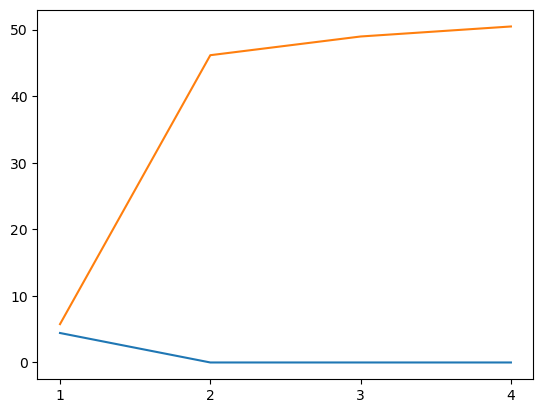

In [81]:
plt.plot(J.keys(), J.values())

Clearly degree 1 has the lowest test_error, and due to high variance the test_error increases

In [82]:
ridge = Ridge(alpha = 10e6)

poly_reg = PolynomialFeatures(degree = 2)
x_poly_train = poly_reg.fit_transform(x_train)
x_poly_test = poly_reg.fit_transform(x_test)
ridge.fit(x_poly_train, y_train)

mean_squared_error(ridge.predict(x_poly_test), y_test)

14.973300645035655

This is the lowest error that we can get from a polynomial reg model... 

In [83]:
model = Ridge(alpha = 10)
model.fit(x_train, y_train)
yhat_test = model.predict(x_test)
print(f"Testing MSE: {mean_squared_error(y_test, yhat_test)}")

Testing MSE: 11.237178423746085


This is the best we can do from Linear regression model, with Ridge Classification

In [84]:
model = Lasso(alpha = 10)
model.fit(x_train, y_train)
yhat_test = model.predict(x_test)
print(f"Testing MSE: {mean_squared_error(y_test, yhat_test)}")

Testing MSE: 15.06453868391857


In [85]:
model = ElasticNet(alpha = 10)
model.fit(x_train, y_train)
yhat_test = model.predict(x_test)
print(f"Testing MSE: {mean_squared_error(y_test, yhat_test)}")

Testing MSE: 15.06453868391857


In [86]:
results['Regression'] = 11.237178423746085

In [87]:
import pickle
with open('../models/regression.pkl', 'wb') as file:
    pickle.dump(model, file)
file.close()

## Neural Networks Approach

In [88]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.activations import linear, relu, sigmoid, softmax
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy, SparseCategoricalCrossentropy, MeanSquaredError

In [89]:
def build_models():
    
    tf.random.set_seed(20)
    
    model_1 = Sequential(
        [
            Dense(25, activation = 'relu'),
            Dense(15, activation = 'relu'),
            Dense(1, activation = 'linear')
        ],
        name='model_1'
    )

    model_2 = Sequential(
        [
            Dense(20, activation = 'relu'),
            Dense(12, activation = 'relu'),
            Dense(12, activation = 'relu'),
            Dense(20, activation = 'relu'),
            Dense(1, activation = 'linear')
        ],
        name='model_2'
    )

    model_3 = Sequential(
        [
            Dense(32, activation = 'relu'),
            Dense(16, activation = 'relu'),
            Dense(8, activation = 'relu'),
            Dense(4, activation = 'relu'),
            Dense(12, activation = 'relu'),
            Dense(1, activation = 'linear')
        ],
        name='model_3'
    )
    
    model_list = [model_1, model_2, model_3]
    
    return model_list

Testing the above structures, and then choosing the one that gives lowest error

In [90]:
# Initialize lists that will contain the errors for each model
nn_train_mses = []
nn_test_mses = []

# Build the models
nn_models = build_models()

# Loop over the models
for model in nn_models:

    # Setup the loss and optimizer
    model.compile(
        loss = 'mse',
        optimizer = tf.keras.optimizers.Adam(learning_rate=0.1),
    )

    print(f"Training {model.name}...")

    # Train the model
    model.fit(
        x_train, y_train,
        epochs = 300,
        verbose = 0,
    )

    print("Done!\n")

    # Record the training MSEs
    yhat_train = model.predict(x_train)
    train_mse = mean_squared_error(y_train, yhat_train)/2
    nn_train_mses.append(train_mse)

    # Record the cross validation MSEs
    yhat_test = model.predict(x_test)
    test_mse = mean_squared_error(y_test, yhat_test)/2
    nn_test_mses.append(test_mse)

# print results
print("RESULTS:")
for model_num in range(len(nn_train_mses)):
    print(
        f"Model {model_num+1}: Training MSE: {nn_train_mses[model_num]:.2f}, " +
        f"Test MSE: {nn_test_mses[model_num]:.2f}"
    )

Training model_1...


Done!

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Training model_2...
Done!

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Training model_3...
Done!

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
RESULTS:
Model 1: Training MSE: 5.63, Test MSE: 7.98
Model 2: Training MSE: 3.80, Test MSE: 6.23
Model 3: Training MSE: 1.96, Test MSE: 8.09


### Trying Regularizers

In [91]:
from tensorflow.keras.regularizers import L2
def build_models(lambda_):
    
    tf.random.set_seed(20)
    
    model_1 = Sequential(
        [
            Dense(25, activation = 'relu', kernel_regularizer=L2(lambda_)),
            Dense(15, activation = 'relu', kernel_regularizer=L2(lambda_)),
            Dense(1, activation = 'linear', kernel_regularizer=L2(lambda_))
        ],
        name='model_1'
    )

    model_2 = Sequential(
        [
            Dense(20, activation = 'relu', kernel_regularizer=L2(lambda_)),
            Dense(12, activation = 'relu', kernel_regularizer=L2(lambda_)),
            Dense(12, activation = 'relu', kernel_regularizer=L2(lambda_)),
            Dense(20, activation = 'relu', kernel_regularizer=L2(lambda_)),
            Dense(1, activation = 'linear', kernel_regularizer=L2(lambda_))
        ],
        name='model_2'
    )

    model_3 = Sequential(
        [
            Dense(32, activation = 'relu', kernel_regularizer=L2(lambda_)),
            Dense(16, activation = 'relu', kernel_regularizer=L2(lambda_)),
            Dense(8, activation = 'relu', kernel_regularizer=L2(lambda_)),
            Dense(4, activation = 'relu', kernel_regularizer=L2(lambda_)),
            Dense(12, activation = 'relu', kernel_regularizer=L2(lambda_)),
            Dense(1, activation = 'linear', kernel_regularizer=L2(lambda_))
        ],
        name='model_3'
    )
    
    model_list = [model_1, model_2, model_3]
    
    return model_list

In [92]:
# Initialize lists that will contain the errors for each model
nn_train_mses = []
nn_test_mses = []

# Build the models
nn_models = build_models(0.01)

# Loop over the models
for model in nn_models:

    # Setup the loss and optimizer
    model.compile(
        loss = 'mse',
        optimizer = tf.keras.optimizers.Adam(learning_rate=0.1),
    )

    print(f"Training {model.name}...")

    # Train the model
    model.fit(
        x_train, y_train,
        epochs = 300,
        verbose = 0,
    )

    print("Done!\n")

    # Record the training MSEs
    yhat_train = model.predict(x_train)
    train_mse = mean_squared_error(y_train, yhat_train)/2
    nn_train_mses.append(train_mse)

    # Record the cross validation MSEs
    yhat_test = model.predict(x_test)
    test_mse = mean_squared_error(y_test, yhat_test)/2
    nn_test_mses.append(test_mse)

# print results
print("RESULTS:")
for model_num in range(len(nn_train_mses)):
    print(
        f"Model {model_num+1}: Training MSE: {nn_train_mses[model_num]:.2f}, " +
        f"Test MSE: {nn_test_mses[model_num]:.2f}"
    )

Training model_1...
Done!

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Training model_2...
Done!

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Training model_3...
Done!

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
RESULTS:
Model 1: Training MSE: 3.66, Test MSE: 5.25
Model 2: Training MSE: 5.04, Test MSE: 5.32
Model 3: Training MSE: 5.04, Test MSE: 5.47


We see that model three is better... hence we use this model further

In [93]:
def build_model(lambda_):
    model = Sequential(
        [
            Dense(32, activation = 'relu', kernel_regularizer=L2(lambda_)),
            Dense(16, activation = 'relu', kernel_regularizer=L2(lambda_)),
            Dense(8, activation = 'relu', kernel_regularizer=L2(lambda_)),
            Dense(4, activation = 'relu', kernel_regularizer=L2(lambda_)),
            Dense(12, activation = 'relu', kernel_regularizer=L2(lambda_)),
            Dense(1, activation = 'linear', kernel_regularizer=L2(lambda_))
        ],
        name='model_3'
    )
    return model

In [94]:
nn_train_mses = []
nn_test_mses = []
lambdas = []

for i in range(1, 50, 2):
    lambda_ = 0.001*2*i
    lambdas.append(lambda_)
    model = build_model(lambda_)

    model.compile(
        loss = 'mse',
        optimizer = Adam(learning_rate=0.1),
    )
    print(f"Training for lambda = {lambda_}...")

    model.fit(
        x_train, y_train,
        epochs = 300,
        verbose = 0,
    )

    print("Done!\n")

    yhat_train = model.predict(x_train)
    train_mse = mean_squared_error(y_train, yhat_train)/2
    nn_train_mses.append(train_mse)

    yhat_test = model.predict(x_test)
    test_mse = mean_squared_error(y_test, yhat_test)/2
    nn_test_mses.append(test_mse)

print("RESULT:")
idx = 0
for lambda_ in lambdas:
    print(
        f"Lambda = {lambda_}:\nTraining MSE: {nn_train_mses[idx]:.2f}, " +
        f"Test MSE: {nn_test_mses[idx]:.2f}"
    )
    idx += 1

Training for lambda = 0.002...
Done!

9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Training for lambda = 0.006...
Done!

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Training for lambda = 0.01...
Done!

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Training for lambda = 0.014...
Done!

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Training for lambda = 0.018000000000000002...
Done!

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Training for lambda = 0.022...
Done!

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Training for lambda = 0.026000000000000002...
Done!

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Training for lambda = 0.03...
Done!

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Training for lambda = 0.034...
Done!

9/9 ━━━━━━━━━━━━━━━━━━

From the Above iterations, we choose the lambda value 0.066

In [115]:
lambda_ = 0.066
model = Sequential(
    [
        Dense(32, activation = 'relu', kernel_regularizer=L2(lambda_)),
        Dense(16, activation = 'relu', kernel_regularizer=L2(lambda_)),
        Dense(8, activation = 'relu', kernel_regularizer=L2(lambda_)),
        Dense(4, activation = 'relu', kernel_regularizer=L2(lambda_)),
        Dense(12, activation = 'relu', kernel_regularizer=L2(lambda_)),
        Dense(1, activation = 'linear', kernel_regularizer=L2(lambda_))
    ],
    name='model_fin'
)

In [116]:
model.compile(
    loss = 'mse',
    optimizer = Adam(learning_rate=0.1),
)
model.fit(x_train, y_train,
          epochs = 300,
          verbose = 0)

In [117]:
yhat_train = model.predict(x_train)
print(f"The training set error is: {mean_squared_error(y_train, yhat_train)/2}")

yhat_test = model.predict(x_test)
print(f"The testing set error is: {mean_squared_error(y_test, yhat_test)/2}")

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
The training set error is: 4.574819033013354
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
The testing set error is: 5.416108865579467


In [118]:
results['NN'] = 5.416108865579467

In [123]:
model.save('../models/Neural.keras')

## Descision Tree Approach

In [124]:
from xgboost import XGBRegressor

[0]	validation_0-rmse:9.77619
[1]	validation_0-rmse:8.90434
[2]	validation_0-rmse:8.11409
[3]	validation_0-rmse:7.44060
[4]	validation_0-rmse:6.87023
[5]	validation_0-rmse:6.34432
[6]	validation_0-rmse:5.87872
[7]	validation_0-rmse:5.48984
[8]	validation_0-rmse:5.16440
[9]	validation_0-rmse:4.85595
[10]	validation_0-rmse:4.58711
[11]	validation_0-rmse:4.38140
[12]	validation_0-rmse:4.20478
[13]	validation_0-rmse:4.05450
[14]	validation_0-rmse:3.94372
[15]	validation_0-rmse:3.84729
[16]	validation_0-rmse:3.76284
[17]	validation_0-rmse:3.70530
[18]	validation_0-rmse:3.64438
[19]	validation_0-rmse:3.59791
[20]	validation_0-rmse:3.54471
[21]	validation_0-rmse:3.50350
[22]	validation_0-rmse:3.46628
[23]	validation_0-rmse:3.43515
[24]	validation_0-rmse:3.41464


c:\Users\rishi\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[25]	validation_0-rmse:3.40752
[26]	validation_0-rmse:3.39316
[27]	validation_0-rmse:3.38189
[28]	validation_0-rmse:3.36608
[29]	validation_0-rmse:3.35815
[30]	validation_0-rmse:3.35317
[31]	validation_0-rmse:3.35528
[32]	validation_0-rmse:3.35438
[33]	validation_0-rmse:3.36142
[34]	validation_0-rmse:3.35972
[35]	validation_0-rmse:3.35604
[36]	validation_0-rmse:3.35088
[37]	validation_0-rmse:3.35117
[38]	validation_0-rmse:3.36190
[39]	validation_0-rmse:3.36033
[40]	validation_0-rmse:3.36152
[41]	validation_0-rmse:3.35599
[42]	validation_0-rmse:3.35708
[43]	validation_0-rmse:3.35617
[44]	validation_0-rmse:3.35471
[45]	validation_0-rmse:3.35720
[46]	validation_0-rmse:3.35482
[0]	validation_0-rmse:9.77619
[1]	validation_0-rmse:8.90434
[2]	validation_0-rmse:8.11409
[3]	validation_0-rmse:7.44060
[4]	validation_0-rmse:6.87023
[5]	validation_0-rmse:6.34432
[6]	validation_0-rmse:5.87872
[7]	validation_0-rmse:5.48984
[8]	validation_0-rmse:5.16440
[9]	validation_0-rmse:4.85595
[10]	validation_0-

c:\Users\rishi\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[33]	validation_0-rmse:3.37397
[34]	validation_0-rmse:3.37268
[35]	validation_0-rmse:3.36854
[36]	validation_0-rmse:3.36490
[37]	validation_0-rmse:3.37095
[38]	validation_0-rmse:3.37254
[39]	validation_0-rmse:3.37368
[40]	validation_0-rmse:3.37798
[0]	validation_0-rmse:9.77619
[1]	validation_0-rmse:8.90434
[2]	validation_0-rmse:8.11409
[3]	validation_0-rmse:7.44060
[4]	validation_0-rmse:6.87023
[5]	validation_0-rmse:6.34432
[6]	validation_0-rmse:5.87872
[7]	validation_0-rmse:5.48984
[8]	validation_0-rmse:5.16440
[9]	validation_0-rmse:4.85595
[10]	validation_0-rmse:4.58713
[11]	validation_0-rmse:4.38143
[12]	validation_0-rmse:4.20481
[13]	validation_0-rmse:4.05453
[14]	validation_0-rmse:3.94383
[15]	validation_0-rmse:3.84740
[16]	validation_0-rmse:3.76295
[17]	validation_0-rmse:3.70542
[18]	validation_0-rmse:3.64452
[19]	validation_0-rmse:3.59806
[20]	validation_0-rmse:3.54487
[21]	validation_0-rmse:3.50404
[22]	validation_0-rmse:3.46683
[23]	validation_0-rmse:3.43571
[24]	validation_0-

c:\Users\rishi\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[30]	validation_0-rmse:3.36156
[31]	validation_0-rmse:3.35843
[32]	validation_0-rmse:3.35895
[33]	validation_0-rmse:3.36376
[34]	validation_0-rmse:3.36271
[35]	validation_0-rmse:3.36474
[36]	validation_0-rmse:3.37104
[37]	validation_0-rmse:3.37281
[38]	validation_0-rmse:3.37265
[0]	validation_0-rmse:9.77619
[1]	validation_0-rmse:8.90434
[2]	validation_0-rmse:8.11409
[3]	validation_0-rmse:7.44060
[4]	validation_0-rmse:6.87044
[5]	validation_0-rmse:6.34452
[6]	validation_0-rmse:5.87822
[7]	validation_0-rmse:5.48915
[8]	validation_0-rmse:5.16419
[9]	validation_0-rmse:4.85573
[10]	validation_0-rmse:4.58689
[11]	validation_0-rmse:4.38110
[12]	validation_0-rmse:4.20450
[13]	validation_0-rmse:4.05415
[14]	validation_0-rmse:3.94274
[15]	validation_0-rmse:3.83392
[16]	validation_0-rmse:3.75754
[17]	validation_0-rmse:3.70694
[18]	validation_0-rmse:3.66132
[19]	validation_0-rmse:3.61206
[20]	validation_0-rmse:3.59549
[21]	validation_0-rmse:3.56835
[22]	validation_0-rmse:3.52755
[23]	validation_0-

c:\Users\rishi\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[25]	validation_0-rmse:3.45132
[26]	validation_0-rmse:3.42632
[27]	validation_0-rmse:3.41705
[28]	validation_0-rmse:3.40326
[29]	validation_0-rmse:3.39210
[30]	validation_0-rmse:3.38398
[31]	validation_0-rmse:3.37569
[32]	validation_0-rmse:3.37187
[33]	validation_0-rmse:3.37454
[34]	validation_0-rmse:3.36513
[35]	validation_0-rmse:3.36250
[36]	validation_0-rmse:3.36541
[37]	validation_0-rmse:3.36209
[38]	validation_0-rmse:3.36608
[39]	validation_0-rmse:3.37678
[40]	validation_0-rmse:3.37337
[41]	validation_0-rmse:3.37951
[42]	validation_0-rmse:3.39266
[43]	validation_0-rmse:3.39414
[44]	validation_0-rmse:3.39581
[45]	validation_0-rmse:3.39372
[46]	validation_0-rmse:3.39082
[0]	validation_0-rmse:9.77619
[1]	validation_0-rmse:8.90434
[2]	validation_0-rmse:8.11409
[3]	validation_0-rmse:7.44060
[4]	validation_0-rmse:6.87044
[5]	validation_0-rmse:6.34452
[6]	validation_0-rmse:5.87822
[7]	validation_0-rmse:5.48915
[8]	validation_0-rmse:5.16419
[9]	validation_0-rmse:4.85573
[10]	validation_0-

c:\Users\rishi\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[30]	validation_0-rmse:3.38392
[31]	validation_0-rmse:3.37563
[32]	validation_0-rmse:3.37181
[33]	validation_0-rmse:3.37449
[34]	validation_0-rmse:3.36505
[35]	validation_0-rmse:3.36242
[36]	validation_0-rmse:3.36533
[37]	validation_0-rmse:3.36201
[38]	validation_0-rmse:3.36599
[39]	validation_0-rmse:3.37669
[40]	validation_0-rmse:3.37329
[41]	validation_0-rmse:3.37943
[42]	validation_0-rmse:3.39257
[43]	validation_0-rmse:3.39405
[44]	validation_0-rmse:3.39572
[45]	validation_0-rmse:3.39363
[46]	validation_0-rmse:3.39073
[0]	validation_0-rmse:9.77619
[1]	validation_0-rmse:8.90434
[2]	validation_0-rmse:8.11409
[3]	validation_0-rmse:7.44060
[4]	validation_0-rmse:6.87044
[5]	validation_0-rmse:6.34452
[6]	validation_0-rmse:5.87822
[7]	validation_0-rmse:5.48915
[8]	validation_0-rmse:5.16419
[9]	validation_0-rmse:4.85573
[10]	validation_0-rmse:4.58689
[11]	validation_0-rmse:4.38110
[12]	validation_0-rmse:4.20450
[13]	validation_0-rmse:4.05415
[14]	validation_0-rmse:3.94274
[15]	validation_0-

c:\Users\rishi\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[24]	validation_0-rmse:3.48319
[25]	validation_0-rmse:3.45132
[26]	validation_0-rmse:3.42631
[27]	validation_0-rmse:3.41696
[28]	validation_0-rmse:3.40317
[29]	validation_0-rmse:3.39195
[30]	validation_0-rmse:3.38462
[31]	validation_0-rmse:3.38571
[32]	validation_0-rmse:3.37393
[33]	validation_0-rmse:3.36979
[34]	validation_0-rmse:3.37408
[35]	validation_0-rmse:3.37171
[36]	validation_0-rmse:3.37275
[37]	validation_0-rmse:3.37528
[38]	validation_0-rmse:3.37885
[39]	validation_0-rmse:3.38216
[40]	validation_0-rmse:3.38295
[41]	validation_0-rmse:3.38523
[42]	validation_0-rmse:3.38992
[43]	validation_0-rmse:3.39329
[0]	validation_0-rmse:9.77619
[1]	validation_0-rmse:8.90434
[2]	validation_0-rmse:8.11409
[3]	validation_0-rmse:7.44060
[4]	validation_0-rmse:6.87044
[5]	validation_0-rmse:6.34452
[6]	validation_0-rmse:5.87822
[7]	validation_0-rmse:5.48803
[8]	validation_0-rmse:5.16308
[9]	validation_0-rmse:4.85608
[10]	validation_0-rmse:4.58712
[11]	validation_0-rmse:4.38104
[12]	validation_0-

c:\Users\rishi\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[28]	validation_0-rmse:3.35330
[29]	validation_0-rmse:3.34302
[30]	validation_0-rmse:3.34313
[31]	validation_0-rmse:3.33230
[32]	validation_0-rmse:3.33514
[33]	validation_0-rmse:3.32936
[34]	validation_0-rmse:3.33228
[35]	validation_0-rmse:3.33531
[36]	validation_0-rmse:3.33698
[37]	validation_0-rmse:3.34020
[38]	validation_0-rmse:3.33794
[39]	validation_0-rmse:3.33904
[40]	validation_0-rmse:3.34112
[41]	validation_0-rmse:3.34423
[42]	validation_0-rmse:3.34634
[43]	validation_0-rmse:3.33734
[0]	validation_0-rmse:9.77619
[1]	validation_0-rmse:8.90434
[2]	validation_0-rmse:8.11409
[3]	validation_0-rmse:7.44060
[4]	validation_0-rmse:6.87044
[5]	validation_0-rmse:6.34452
[6]	validation_0-rmse:5.87822
[7]	validation_0-rmse:5.48803
[8]	validation_0-rmse:5.16308
[9]	validation_0-rmse:4.85608
[10]	validation_0-rmse:4.58712
[11]	validation_0-rmse:4.38104
[12]	validation_0-rmse:4.20454
[13]	validation_0-rmse:4.05384
[14]	validation_0-rmse:3.94031
[15]	validation_0-rmse:3.84404
[16]	validation_0-

c:\Users\rishi\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[33]	validation_0-rmse:3.31549
[34]	validation_0-rmse:3.31238
[35]	validation_0-rmse:3.31453
[36]	validation_0-rmse:3.30920
[37]	validation_0-rmse:3.31066
[38]	validation_0-rmse:3.30590
[39]	validation_0-rmse:3.30737
[40]	validation_0-rmse:3.31130
[41]	validation_0-rmse:3.31211
[42]	validation_0-rmse:3.30999
[43]	validation_0-rmse:3.31331
[44]	validation_0-rmse:3.31111
[45]	validation_0-rmse:3.31540
[46]	validation_0-rmse:3.31270
[47]	validation_0-rmse:3.30820
[48]	validation_0-rmse:3.30498
[49]	validation_0-rmse:3.30677
[50]	validation_0-rmse:3.30796
[51]	validation_0-rmse:3.31787
[52]	validation_0-rmse:3.31673
[53]	validation_0-rmse:3.32993
[54]	validation_0-rmse:3.33474
[55]	validation_0-rmse:3.33520
[56]	validation_0-rmse:3.33476
[57]	validation_0-rmse:3.33226
[58]	validation_0-rmse:3.33096
[0]	validation_0-rmse:9.77619
[1]	validation_0-rmse:8.90434
[2]	validation_0-rmse:8.11409
[3]	validation_0-rmse:7.44060
[4]	validation_0-rmse:6.87044
[5]	validation_0-rmse:6.34452
[6]	validation

c:\Users\rishi\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[12]	validation_0-rmse:4.20454
[13]	validation_0-rmse:4.05384
[14]	validation_0-rmse:3.94031
[15]	validation_0-rmse:3.84404
[16]	validation_0-rmse:3.76077
[17]	validation_0-rmse:3.70320
[18]	validation_0-rmse:3.64379
[19]	validation_0-rmse:3.59703
[20]	validation_0-rmse:3.54449
[21]	validation_0-rmse:3.50526
[22]	validation_0-rmse:3.46815
[23]	validation_0-rmse:3.43680
[24]	validation_0-rmse:3.43254
[25]	validation_0-rmse:3.41242
[26]	validation_0-rmse:3.38764
[27]	validation_0-rmse:3.37026
[28]	validation_0-rmse:3.35915
[29]	validation_0-rmse:3.34136
[30]	validation_0-rmse:3.32806
[31]	validation_0-rmse:3.32015
[32]	validation_0-rmse:3.31704
[33]	validation_0-rmse:3.31345
[34]	validation_0-rmse:3.31571
[35]	validation_0-rmse:3.30936
[36]	validation_0-rmse:3.31176
[37]	validation_0-rmse:3.31433
[38]	validation_0-rmse:3.31237
[39]	validation_0-rmse:3.31391
[40]	validation_0-rmse:3.31626
[41]	validation_0-rmse:3.31895
[42]	validation_0-rmse:3.32389
[43]	validation_0-rmse:3.32010
[44]	val

c:\Users\rishi\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[23]	validation_0-rmse:3.43805
[24]	validation_0-rmse:3.43378
[25]	validation_0-rmse:3.41368
[26]	validation_0-rmse:3.38884
[27]	validation_0-rmse:3.37148
[28]	validation_0-rmse:3.36037
[29]	validation_0-rmse:3.34257
[30]	validation_0-rmse:3.32932
[31]	validation_0-rmse:3.32144
[32]	validation_0-rmse:3.31934
[33]	validation_0-rmse:3.32009
[34]	validation_0-rmse:3.32034
[35]	validation_0-rmse:3.31340
[36]	validation_0-rmse:3.30917
[37]	validation_0-rmse:3.31383
[38]	validation_0-rmse:3.31531
[39]	validation_0-rmse:3.32211
[40]	validation_0-rmse:3.33052
[41]	validation_0-rmse:3.32931
[42]	validation_0-rmse:3.32791
[43]	validation_0-rmse:3.31965
[44]	validation_0-rmse:3.31914
[45]	validation_0-rmse:3.32243
[46]	validation_0-rmse:3.32343
[0]	validation_0-rmse:9.77619
[1]	validation_0-rmse:8.90434
[2]	validation_0-rmse:8.11409
[3]	validation_0-rmse:7.44060
[4]	validation_0-rmse:6.87044
[5]	validation_0-rmse:6.34452
[6]	validation_0-rmse:5.87822
[7]	validation_0-rmse:5.48803
[8]	validation_0

c:\Users\rishi\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[26]	validation_0-rmse:3.38876
[27]	validation_0-rmse:3.37630
[28]	validation_0-rmse:3.35889
[29]	validation_0-rmse:3.34924
[30]	validation_0-rmse:3.33746
[31]	validation_0-rmse:3.33170
[32]	validation_0-rmse:3.33144
[33]	validation_0-rmse:3.33568
[34]	validation_0-rmse:3.33509
[35]	validation_0-rmse:3.33781
[36]	validation_0-rmse:3.34131
[37]	validation_0-rmse:3.34342
[38]	validation_0-rmse:3.34080
[39]	validation_0-rmse:3.34456
[40]	validation_0-rmse:3.34720
[41]	validation_0-rmse:3.34878
[42]	validation_0-rmse:3.35066
[0]	validation_0-rmse:9.77619
[1]	validation_0-rmse:8.90434
[2]	validation_0-rmse:8.11409
[3]	validation_0-rmse:7.44060
[4]	validation_0-rmse:6.87044
[5]	validation_0-rmse:6.34452
[6]	validation_0-rmse:5.87822
[7]	validation_0-rmse:5.48803
[8]	validation_0-rmse:5.16308
[9]	validation_0-rmse:4.85608
[10]	validation_0-rmse:4.58712
[11]	validation_0-rmse:4.38104
[12]	validation_0-rmse:4.20454
[13]	validation_0-rmse:4.05384
[14]	validation_0-rmse:3.94031
[15]	validation_0-

c:\Users\rishi\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[23]	validation_0-rmse:3.43807
[24]	validation_0-rmse:3.43380
[25]	validation_0-rmse:3.41361
[26]	validation_0-rmse:3.38876
[27]	validation_0-rmse:3.37631
[28]	validation_0-rmse:3.35889
[29]	validation_0-rmse:3.34924
[30]	validation_0-rmse:3.33747
[31]	validation_0-rmse:3.33170
[32]	validation_0-rmse:3.33145
[33]	validation_0-rmse:3.33569
[34]	validation_0-rmse:3.33510
[35]	validation_0-rmse:3.33781
[36]	validation_0-rmse:3.34133
[37]	validation_0-rmse:3.34344
[38]	validation_0-rmse:3.34082
[39]	validation_0-rmse:3.34458
[40]	validation_0-rmse:3.34722
[41]	validation_0-rmse:3.34939
[0]	validation_0-rmse:9.77619
[1]	validation_0-rmse:8.90434
[2]	validation_0-rmse:8.11409
[3]	validation_0-rmse:7.44060
[4]	validation_0-rmse:6.87044
[5]	validation_0-rmse:6.34452
[6]	validation_0-rmse:5.87822
[7]	validation_0-rmse:5.48803
[8]	validation_0-rmse:5.16308
[9]	validation_0-rmse:4.85608
[10]	validation_0-rmse:4.58712
[11]	validation_0-rmse:4.38104
[12]	validation_0-rmse:4.20454
[13]	validation_0-

c:\Users\rishi\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[18]	validation_0-rmse:3.64379
[19]	validation_0-rmse:3.59807
[20]	validation_0-rmse:3.54557
[21]	validation_0-rmse:3.50689
[22]	validation_0-rmse:3.46980
[23]	validation_0-rmse:3.43843
[24]	validation_0-rmse:3.42432
[25]	validation_0-rmse:3.40206
[26]	validation_0-rmse:3.38609
[27]	validation_0-rmse:3.36871
[28]	validation_0-rmse:3.36145
[29]	validation_0-rmse:3.35149
[30]	validation_0-rmse:3.34165
[31]	validation_0-rmse:3.34130
[32]	validation_0-rmse:3.33146
[33]	validation_0-rmse:3.33539
[34]	validation_0-rmse:3.33792
[35]	validation_0-rmse:3.33483
[36]	validation_0-rmse:3.33709
[37]	validation_0-rmse:3.34103
[38]	validation_0-rmse:3.34429
[39]	validation_0-rmse:3.34782
[40]	validation_0-rmse:3.35176
[41]	validation_0-rmse:3.35485
[42]	validation_0-rmse:3.35605
[0]	validation_0-rmse:9.77619
[1]	validation_0-rmse:8.90434
[2]	validation_0-rmse:8.11409
[3]	validation_0-rmse:7.44060
[4]	validation_0-rmse:6.87044
[5]	validation_0-rmse:6.34452
[6]	validation_0-rmse:5.87822
[7]	validation_

c:\Users\rishi\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[30]	validation_0-rmse:3.33763
[31]	validation_0-rmse:3.33186
[32]	validation_0-rmse:3.33161
[33]	validation_0-rmse:3.33583
[34]	validation_0-rmse:3.33929
[35]	validation_0-rmse:3.33873
[36]	validation_0-rmse:3.34171
[37]	validation_0-rmse:3.34362
[38]	validation_0-rmse:3.34465
[39]	validation_0-rmse:3.34146
[40]	validation_0-rmse:3.34493
[41]	validation_0-rmse:3.34201
[0]	validation_0-rmse:9.77619
[1]	validation_0-rmse:8.90434
[2]	validation_0-rmse:8.11409
[3]	validation_0-rmse:7.44060
[4]	validation_0-rmse:6.87044
[5]	validation_0-rmse:6.34452
[6]	validation_0-rmse:5.87822
[7]	validation_0-rmse:5.48803
[8]	validation_0-rmse:5.16308
[9]	validation_0-rmse:4.85608
[10]	validation_0-rmse:4.58712
[11]	validation_0-rmse:4.37926
[12]	validation_0-rmse:4.20280
[13]	validation_0-rmse:4.05214
[14]	validation_0-rmse:3.93865
[15]	validation_0-rmse:3.84256
[16]	validation_0-rmse:3.75947
[17]	validation_0-rmse:3.70186
[18]	validation_0-rmse:3.64251
[19]	validation_0-rmse:3.59684
[20]	validation_0-

c:\Users\rishi\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[23]	validation_0-rmse:3.43799
[24]	validation_0-rmse:3.43369
[25]	validation_0-rmse:3.41347
[26]	validation_0-rmse:3.38859
[27]	validation_0-rmse:3.37122
[28]	validation_0-rmse:3.36008
[29]	validation_0-rmse:3.34259
[30]	validation_0-rmse:3.32931
[31]	validation_0-rmse:3.32264
[32]	validation_0-rmse:3.32185
[33]	validation_0-rmse:3.32479
[34]	validation_0-rmse:3.32503
[35]	validation_0-rmse:3.31915
[36]	validation_0-rmse:3.31711
[37]	validation_0-rmse:3.32399
[38]	validation_0-rmse:3.32670
[39]	validation_0-rmse:3.32982
[40]	validation_0-rmse:3.33355
[41]	validation_0-rmse:3.32972
[42]	validation_0-rmse:3.33038
[43]	validation_0-rmse:3.32930
[44]	validation_0-rmse:3.32854
[45]	validation_0-rmse:3.32958
[0]	validation_0-rmse:9.77619


c:\Users\rishi\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[1]	validation_0-rmse:8.90434
[2]	validation_0-rmse:8.11409
[3]	validation_0-rmse:7.44060
[4]	validation_0-rmse:6.87044
[5]	validation_0-rmse:6.34452
[6]	validation_0-rmse:5.87822
[7]	validation_0-rmse:5.48803
[8]	validation_0-rmse:5.16308
[9]	validation_0-rmse:4.85608
[10]	validation_0-rmse:4.58712
[11]	validation_0-rmse:4.37926
[12]	validation_0-rmse:4.20280
[13]	validation_0-rmse:4.05214
[14]	validation_0-rmse:3.93865
[15]	validation_0-rmse:3.84256
[16]	validation_0-rmse:3.75947
[17]	validation_0-rmse:3.70186
[18]	validation_0-rmse:3.64252
[19]	validation_0-rmse:3.59685
[20]	validation_0-rmse:3.54483
[21]	validation_0-rmse:3.50604
[22]	validation_0-rmse:3.46932
[23]	validation_0-rmse:3.43794
[24]	validation_0-rmse:3.43368
[25]	validation_0-rmse:3.41347
[26]	validation_0-rmse:3.38861
[27]	validation_0-rmse:3.37123
[28]	validation_0-rmse:3.36011
[29]	validation_0-rmse:3.34586
[30]	validation_0-rmse:3.33254
[31]	validation_0-rmse:3.32465
[32]	validation_0-rmse:3.32265
[33]	validation_0

c:\Users\rishi\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[30]	validation_0-rmse:3.35387
[31]	validation_0-rmse:3.35254
[32]	validation_0-rmse:3.35167
[33]	validation_0-rmse:3.34555
[34]	validation_0-rmse:3.35168
[35]	validation_0-rmse:3.35472
[36]	validation_0-rmse:3.35623
[37]	validation_0-rmse:3.35415
[38]	validation_0-rmse:3.35353
[39]	validation_0-rmse:3.35672
[40]	validation_0-rmse:3.36395
[41]	validation_0-rmse:3.36555
[42]	validation_0-rmse:3.36959
[43]	validation_0-rmse:3.36306
[0]	validation_0-rmse:9.77619
[1]	validation_0-rmse:8.90434
[2]	validation_0-rmse:8.11409
[3]	validation_0-rmse:7.44060
[4]	validation_0-rmse:6.87044
[5]	validation_0-rmse:6.34452
[6]	validation_0-rmse:5.87822
[7]	validation_0-rmse:5.48803
[8]	validation_0-rmse:5.16308
[9]	validation_0-rmse:4.85608
[10]	validation_0-rmse:4.58712
[11]	validation_0-rmse:4.37926
[12]	validation_0-rmse:4.20280
[13]	validation_0-rmse:4.05214
[14]	validation_0-rmse:3.93865
[15]	validation_0-rmse:3.84256
[16]	validation_0-rmse:3.75947
[17]	validation_0-rmse:3.70187
[18]	validation_0-

c:\Users\rishi\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[27]	validation_0-rmse:3.37087
[28]	validation_0-rmse:3.36442
[29]	validation_0-rmse:3.36579
[30]	validation_0-rmse:3.35384
[31]	validation_0-rmse:3.35623
[32]	validation_0-rmse:3.35335
[33]	validation_0-rmse:3.34960
[34]	validation_0-rmse:3.35467
[35]	validation_0-rmse:3.34972
[36]	validation_0-rmse:3.34949
[37]	validation_0-rmse:3.35094
[38]	validation_0-rmse:3.34971
[39]	validation_0-rmse:3.34936
[40]	validation_0-rmse:3.35688
[41]	validation_0-rmse:3.35643
[42]	validation_0-rmse:3.35989
[43]	validation_0-rmse:3.36272
[44]	validation_0-rmse:3.36239
[45]	validation_0-rmse:3.36247
[46]	validation_0-rmse:3.36466
[47]	validation_0-rmse:3.36532
[48]	validation_0-rmse:3.36616
[49]	validation_0-rmse:3.36620
[0]	validation_0-rmse:9.77619
[1]	validation_0-rmse:8.90398
[2]	validation_0-rmse:8.11372
[3]	validation_0-rmse:7.44023
[4]	validation_0-rmse:6.87009
[5]	validation_0-rmse:6.34418
[6]	validation_0-rmse:5.87789
[7]	validation_0-rmse:5.48889
[8]	validation_0-rmse:5.16393
[9]	validation_0-

c:\Users\rishi\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[18]	validation_0-rmse:3.64290
[19]	validation_0-rmse:3.59721
[20]	validation_0-rmse:3.54508
[21]	validation_0-rmse:3.50627
[22]	validation_0-rmse:3.46954
[23]	validation_0-rmse:3.43817
[24]	validation_0-rmse:3.43386
[25]	validation_0-rmse:3.41364
[26]	validation_0-rmse:3.38924
[27]	validation_0-rmse:3.37110
[28]	validation_0-rmse:3.36461
[29]	validation_0-rmse:3.36598
[30]	validation_0-rmse:3.35400
[31]	validation_0-rmse:3.35639
[32]	validation_0-rmse:3.35351
[33]	validation_0-rmse:3.34974
[34]	validation_0-rmse:3.35480
[35]	validation_0-rmse:3.34985
[36]	validation_0-rmse:3.34960
[37]	validation_0-rmse:3.35105
[38]	validation_0-rmse:3.34983
[39]	validation_0-rmse:3.34947
[40]	validation_0-rmse:3.35700
[41]	validation_0-rmse:3.35653
[42]	validation_0-rmse:3.35999
[43]	validation_0-rmse:3.36292
[44]	validation_0-rmse:3.36247
[45]	validation_0-rmse:3.36257
[46]	validation_0-rmse:3.36475
[47]	validation_0-rmse:3.36541
[48]	validation_0-rmse:3.36624
[0]	validation_0-rmse:9.77619
[1]	valid

c:\Users\rishi\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[19]	validation_0-rmse:3.59721
[20]	validation_0-rmse:3.54508
[21]	validation_0-rmse:3.50627
[22]	validation_0-rmse:3.46954
[23]	validation_0-rmse:3.43817
[24]	validation_0-rmse:3.43386
[25]	validation_0-rmse:3.41364
[26]	validation_0-rmse:3.38924
[27]	validation_0-rmse:3.37110
[28]	validation_0-rmse:3.36461
[29]	validation_0-rmse:3.36598
[30]	validation_0-rmse:3.35400
[31]	validation_0-rmse:3.35639
[32]	validation_0-rmse:3.35351
[33]	validation_0-rmse:3.34974
[34]	validation_0-rmse:3.35480
[35]	validation_0-rmse:3.34985
[36]	validation_0-rmse:3.34921
[37]	validation_0-rmse:3.35067
[38]	validation_0-rmse:3.34946
[39]	validation_0-rmse:3.34910
[40]	validation_0-rmse:3.35664
[41]	validation_0-rmse:3.35617
[42]	validation_0-rmse:3.35963
[43]	validation_0-rmse:3.36256
[44]	validation_0-rmse:3.35829
[45]	validation_0-rmse:3.35872
[46]	validation_0-rmse:3.35939
[47]	validation_0-rmse:3.36180
[48]	validation_0-rmse:3.35912
[0]	validation_0-rmse:9.77619
[1]	validation_0-rmse:8.90398
[2]	valida

c:\Users\rishi\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[30]	validation_0-rmse:3.35400
[31]	validation_0-rmse:3.35639
[32]	validation_0-rmse:3.35351
[33]	validation_0-rmse:3.34975
[34]	validation_0-rmse:3.35480
[35]	validation_0-rmse:3.34984
[36]	validation_0-rmse:3.34921
[37]	validation_0-rmse:3.35049
[38]	validation_0-rmse:3.34928
[39]	validation_0-rmse:3.34893
[40]	validation_0-rmse:3.35647
[41]	validation_0-rmse:3.35599
[42]	validation_0-rmse:3.35945
[43]	validation_0-rmse:3.36259
[44]	validation_0-rmse:3.36118
[45]	validation_0-rmse:3.36132
[46]	validation_0-rmse:3.36352
[47]	validation_0-rmse:3.36415
[48]	validation_0-rmse:3.36023
[49]	validation_0-rmse:3.35676
[0]	validation_0-rmse:9.77619
[1]	validation_0-rmse:8.90398
[2]	validation_0-rmse:8.11372
[3]	validation_0-rmse:7.44023
[4]	validation_0-rmse:6.87009
[5]	validation_0-rmse:6.34418
[6]	validation_0-rmse:5.87789


c:\Users\rishi\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[7]	validation_0-rmse:5.48889
[8]	validation_0-rmse:5.16393
[9]	validation_0-rmse:4.85690
[10]	validation_0-rmse:4.58791
[11]	validation_0-rmse:4.37998
[12]	validation_0-rmse:4.20355
[13]	validation_0-rmse:4.05287
[14]	validation_0-rmse:3.93936
[15]	validation_0-rmse:3.84304
[16]	validation_0-rmse:3.75992
[17]	validation_0-rmse:3.70225
[18]	validation_0-rmse:3.64290
[19]	validation_0-rmse:3.59721
[20]	validation_0-rmse:3.54508
[21]	validation_0-rmse:3.50627
[22]	validation_0-rmse:3.46954
[23]	validation_0-rmse:3.43817
[24]	validation_0-rmse:3.43386
[25]	validation_0-rmse:3.41364
[26]	validation_0-rmse:3.38976
[27]	validation_0-rmse:3.37160
[28]	validation_0-rmse:3.36510
[29]	validation_0-rmse:3.36646
[30]	validation_0-rmse:3.35647
[31]	validation_0-rmse:3.35698
[32]	validation_0-rmse:3.35584
[33]	validation_0-rmse:3.35043
[34]	validation_0-rmse:3.35549
[35]	validation_0-rmse:3.35201
[36]	validation_0-rmse:3.35095
[37]	validation_0-rmse:3.35235
[38]	validation_0-rmse:3.35107
[39]	valida

c:\Users\rishi\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[31]	validation_0-rmse:3.35701
[32]	validation_0-rmse:3.35587
[33]	validation_0-rmse:3.35046
[34]	validation_0-rmse:3.35552
[35]	validation_0-rmse:3.35205
[36]	validation_0-rmse:3.35099
[37]	validation_0-rmse:3.35238
[38]	validation_0-rmse:3.35110
[39]	validation_0-rmse:3.34659
[40]	validation_0-rmse:3.35399
[41]	validation_0-rmse:3.35353
[42]	validation_0-rmse:3.35693
[43]	validation_0-rmse:3.36229
[44]	validation_0-rmse:3.36605
[45]	validation_0-rmse:3.36879
[46]	validation_0-rmse:3.37020
[47]	validation_0-rmse:3.36840
[48]	validation_0-rmse:3.36635
[0]	validation_0-rmse:9.77619
[1]	validation_0-rmse:8.90398
[2]	validation_0-rmse:8.11372
[3]	validation_0-rmse:7.44023
[4]	validation_0-rmse:6.87009
[5]	validation_0-rmse:6.34418
[6]	validation_0-rmse:5.87789
[7]	validation_0-rmse:5.48889
[8]	validation_0-rmse:5.16393


c:\Users\rishi\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[9]	validation_0-rmse:4.85690
[10]	validation_0-rmse:4.58791
[11]	validation_0-rmse:4.37998
[12]	validation_0-rmse:4.20355
[13]	validation_0-rmse:4.05287
[14]	validation_0-rmse:3.93936
[15]	validation_0-rmse:3.84304
[16]	validation_0-rmse:3.75992
[17]	validation_0-rmse:3.70225
[18]	validation_0-rmse:3.64290
[19]	validation_0-rmse:3.59721
[20]	validation_0-rmse:3.54507
[21]	validation_0-rmse:3.50626
[22]	validation_0-rmse:3.46952
[23]	validation_0-rmse:3.43815
[24]	validation_0-rmse:3.43384
[25]	validation_0-rmse:3.41362
[26]	validation_0-rmse:3.38972
[27]	validation_0-rmse:3.37157
[28]	validation_0-rmse:3.36508
[29]	validation_0-rmse:3.36644
[30]	validation_0-rmse:3.35745
[31]	validation_0-rmse:3.35700
[32]	validation_0-rmse:3.35586
[33]	validation_0-rmse:3.35209
[34]	validation_0-rmse:3.35559
[35]	validation_0-rmse:3.35212
[36]	validation_0-rmse:3.35107
[37]	validation_0-rmse:3.35247
[38]	validation_0-rmse:3.35119
[39]	validation_0-rmse:3.34667
[40]	validation_0-rmse:3.35407
[41]	vali

c:\Users\rishi\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[32]	validation_0-rmse:3.35587
[33]	validation_0-rmse:3.35209
[34]	validation_0-rmse:3.35558
[35]	validation_0-rmse:3.35211
[36]	validation_0-rmse:3.35106
[37]	validation_0-rmse:3.35245
[38]	validation_0-rmse:3.35117
[39]	validation_0-rmse:3.34653
[40]	validation_0-rmse:3.35393
[41]	validation_0-rmse:3.35348
[42]	validation_0-rmse:3.35688
[43]	validation_0-rmse:3.36225
[44]	validation_0-rmse:3.36601
[45]	validation_0-rmse:3.36875
[46]	validation_0-rmse:3.37017
[47]	validation_0-rmse:3.36836
[48]	validation_0-rmse:3.36632


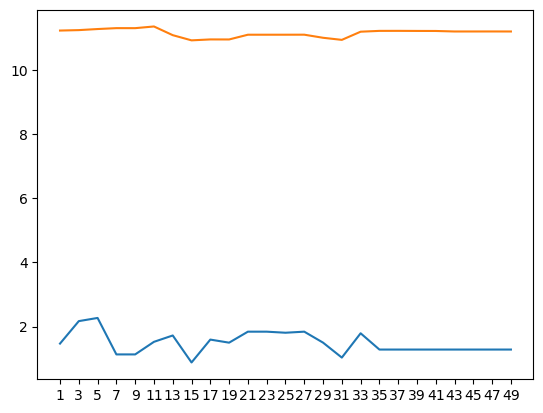

In [125]:
J = {}
for i in range(1, 50, 2):
    lambda_ = 0.001*2*i
    model = XGBRegressor(n_estimators = 500, learning_rate = 0.1, verbosity = 1, random_state = 0, gamma = lambda_)
    model.fit(x_train, y_train, eval_set=[(x_test, y_test)], early_stopping_rounds=10)

    yhat_train = model.predict(x_train)
    yhat_test = model.predict(x_test)

    train_error = mean_squared_error(yhat_train, y_train)
    test_error = mean_squared_error(yhat_test, y_test)

    J[str(i)] = (train_error, test_error)
plt.plot(J.keys(), J.values())

The best is the 31st iteration, 0.062

In [126]:
lambda_ = 0.001*2*31
model = XGBRegressor(n_estimators = 500, learning_rate = 0.1, verbosity = 1, random_state = 0, gamma = lambda_)
model.fit(x_train, y_train, eval_set=[(x_test, y_test)], early_stopping_rounds=10)

yhat_train = model.predict(x_train)
yhat_test = model.predict(x_test)

[0]	validation_0-rmse:9.77619
[1]	validation_0-rmse:8.90434
[2]	validation_0-rmse:8.11409
[3]	validation_0-rmse:7.44060
[4]	validation_0-rmse:6.87044
[5]	validation_0-rmse:6.34452
[6]	validation_0-rmse:5.87822
[7]	validation_0-rmse:5.48803
[8]	validation_0-rmse:5.16308
[9]	validation_0-rmse:4.85608
[10]	validation_0-rmse:4.58712
[11]	validation_0-rmse:4.37926
[12]	validation_0-rmse:4.20280
[13]	validation_0-rmse:4.05214
[14]	validation_0-rmse:3.93865
[15]	validation_0-rmse:3.84256
[16]	validation_0-rmse:3.75947
[17]	validation_0-rmse:3.70186
[18]	validation_0-rmse:3.64252
[19]	validation_0-rmse:3.59685
[20]	validation_0-rmse:3.54483
[21]	validation_0-rmse:3.50604
[22]	validation_0-rmse:3.46932
[23]	validation_0-rmse:3.43794
[24]	validation_0-rmse:3.43368
[25]	validation_0-rmse:3.41347
[26]	validation_0-rmse:3.38861
[27]	validation_0-rmse:3.37123
[28]	validation_0-rmse:3.36011
[29]	validation_0-rmse:3.34586
[30]	validation_0-rmse:3.33254
[31]	validation_0-rmse:3.32465


c:\Users\rishi\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[32]	validation_0-rmse:3.32265
[33]	validation_0-rmse:3.32340
[34]	validation_0-rmse:3.32358
[35]	validation_0-rmse:3.31665
[36]	validation_0-rmse:3.31242
[37]	validation_0-rmse:3.31624
[38]	validation_0-rmse:3.31607
[39]	validation_0-rmse:3.32205
[40]	validation_0-rmse:3.31353
[41]	validation_0-rmse:3.31339
[42]	validation_0-rmse:3.31650
[43]	validation_0-rmse:3.30725
[44]	validation_0-rmse:3.31314
[45]	validation_0-rmse:3.31396
[46]	validation_0-rmse:3.31242
[47]	validation_0-rmse:3.31826
[48]	validation_0-rmse:3.31783
[49]	validation_0-rmse:3.32043
[50]	validation_0-rmse:3.32080
[51]	validation_0-rmse:3.32107
[52]	validation_0-rmse:3.32310


In [127]:
yhat_train = model.predict(x_train)
print(f"The training set error is: {mean_squared_error(y_train, yhat_train)/2}")

yhat_test = model.predict(x_test)
print(f"The testing set error is: {mean_squared_error(y_test, yhat_test)/2}")

The training set error is: 0.5158127348676934
The testing set error is: 5.468958891337183


In [128]:
results['XGB'] = 5.468958891337183
data = {'Model': list(results.keys()), 'Error': list(results.values())}
df = pd.DataFrame(data)
df

,Model,Error
0,Regression,11.237178
1,NN,5.416109
2,XGB,5.468959


In [129]:
import pickle
with open('../models/Tree.pkl', 'wb') as file:
    pickle.dump(model, file)
file.close()

<AxesSubplot:xlabel='Model', ylabel='Error'>

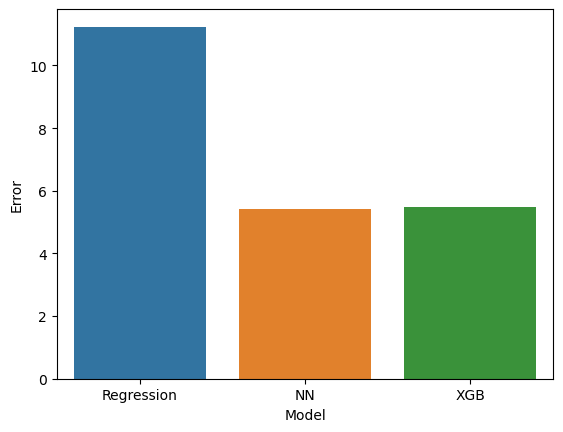

In [130]:
import seaborn as sns
sns.barplot(df, x = 'Model', y = 'Error')